In [1]:
# Imports
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

#coment after moving the imports to /src/methods.py

from sklearn.feature_selection import SelectKBest, f_classif, RFE, chi2, f_classif, mutual_info_classif, f_classif
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import sklearn

from scipy.stats import ttest_ind
import scipy

from xgboost import XGBClassifier
import xgboost

 
sys.path.insert(1, '../src')
import methods as mt


In [2]:
# Check the version of th eused libraries

print(np.__version__)
print(pd.__version__)
print(matplotlib.__version__)
print(sns.__version__)
print(sklearn.__version__)
print(scipy.__version__)
print(xgboost.__version__)

1.26.4
2.2.2
3.9.2
0.13.2


In [3]:
asthma_disease_cleaned_df = pd.read_csv("../data/asthma_disease_data_cleaned.csv")

In [4]:
asthma_disease_cleaned_df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,BMI_Category,FEV1_FVC_Ratio,SymptomSeverity,AllergyScore,TotalExposure
0,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,1,0,0,1,0,Underweight,0.277068,2,1,11.218398
1,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,0,1,1,1,0,Normal,1.290987,4,1,16.012134
2,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,...,1,0,1,1,0,Underweight,0.338077,5,2,8.354581
3,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,...,1,1,1,0,0,Obese,1.318186,4,1,12.119066
4,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,...,1,0,0,1,0,Normal,1.131243,4,1,12.291287


In [5]:
asthma_disease_cleaned_df.drop(['BMI_Category'], axis=1, inplace=True)
asthma_disease_cleaned_df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,FEV1_FVC_Ratio,SymptomSeverity,AllergyScore,TotalExposure
0,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,0,1,0,0,1,0,0.277068,2,1,11.218398
1,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,0,0,1,1,1,0,1.290987,4,1,16.012134
2,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,...,1,1,0,1,1,0,0.338077,5,2,8.354581
3,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,...,0,1,1,1,0,0,1.318186,4,1,12.119066
4,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,...,1,1,0,0,1,0,1.131243,4,1,12.291287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,2.483829,...,1,0,0,0,1,1,0.604961,2,2,13.223856
2388,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,7.733983,...,0,0,1,1,0,1,0.205641,2,1,16.480757
2389,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,2.794847,...,0,1,1,0,1,1,0.503742,4,1,15.333999
2390,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,9.448862,...,1,1,0,1,1,0,2.032104,4,1,22.212851


In [6]:
TARGET = "Diagnosis"
RANDOM_STATE = 42

# Get all columns except 'Diagnosis'
FEATURES = [col for col in asthma_disease_cleaned_df.columns if col != 'Diagnosis' and col != 'BMI_Category']
TARGET = 'Diagnosis'

In [7]:
X = asthma_disease_cleaned_df[FEATURES]
y = asthma_disease_cleaned_df[TARGET]

In [8]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

## Feature Selection
### Method 1: Feature Importance using RandomForest

In [9]:
forest = RandomForestClassifier(random_state = RANDOM_STATE)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
np.array(FEATURES)[indices]

array(['PollutionExposure', 'TotalExposure', 'DustExposure',
       'LungFunctionFVC', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FEV1_FVC_Ratio', 'BMI', 'LungFunctionFEV1',
       'PollenExposure', 'Age', 'SymptomSeverity', 'Ethnicity',
       'AllergyScore', 'EducationLevel', 'NighttimeSymptoms',
       'ShortnessOfBreath', 'FamilyHistoryAsthma', 'Coughing', 'Gender',
       'Wheezing', 'ChestTightness', 'ExerciseInduced',
       'GastroesophagealReflux', 'HistoryOfAllergies', 'HayFever',
       'Smoking', 'PetAllergy', 'Eczema'], dtype='<U22')

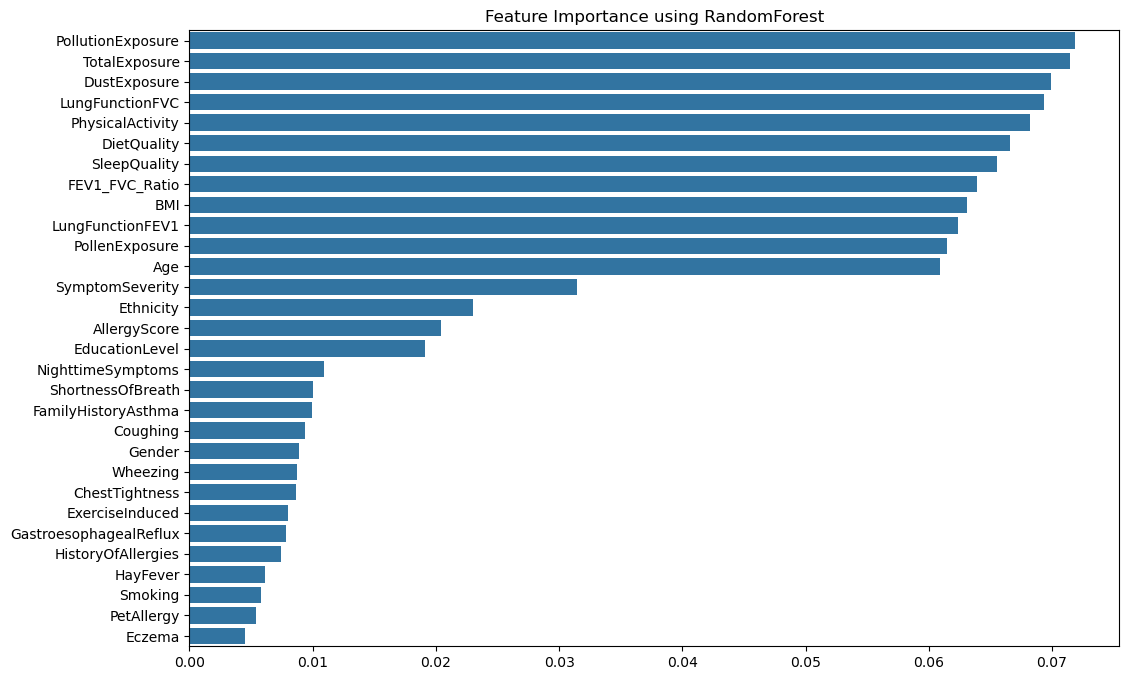

In [11]:
plt.figure(figsize = (12, 8))

sns.barplot(x = importances[indices], y = np.array(FEATURES)[indices])

plt.title("Feature Importance using RandomForest")
plt.show()

In [12]:
# Moved the function get_feature_importance in /src/methods.py

In [13]:
mt.get_feature_importance(X_train, y_train, FEATURES)

NameError: name 'mt' is not defined

## Method 2: Univariate Selection (SelectKBest)

In [ ]:
 # select top 10 features for k
select_kbest = SelectKBest(score_func = f_classif, k = 10) 
select_kbest.fit(X_train, y_train)

In [ ]:
selected_features_kbest = select_kbest.get_support(indices = True)
print("Selected Features using SelectKBest:", X.columns[selected_features_kbest])

In [ ]:
# Moved the function get_feature_importance in /src/methods.py

In [ ]:
mt.get_top_features(X_train, y_train)

### Method 3: Feature Importance using XGBoost

In [ ]:
xgb = XGBClassifier(random_state = 42)
xgb.fit(X_train, y_train)

In [ ]:
xgb_importances = xgb.feature_importances_
indices_xgb = np.argsort(xgb_importances)[::-1]

In [ ]:
plt.figure(figsize = (10, 8))
sns.barplot(x = xgb_importances[indices_xgb], y = np.array(FEATURES)[indices_xgb], color='grey')

plt.title("Feature Importance using XGBoost")
plt.show()

In [ ]:
# Moved the function get_feature_importance in /src/methods.py

In [ ]:
mt.get_feature_importances_xgb(X_train, y_train, FEATURES)

### Method 4: Recursive Feature Elimination (RFE) with Logistic Regression

In [ ]:
logreg = LogisticRegression(max_iter = 1000, random_state = RANDOM_STATE)
rfe = RFE(logreg, n_features_to_select = 10)
rfe.fit(X_train, y_train)

###  Feature Testing and Validation

In [ ]:
 categorical_features = ["Gender", 
                        "Ethnicity", 
                        "EducationLevel", 
                        "PetAllergy", 
                        "FamilyHistoryAsthma",
                        "HistoryOfAllergies", 
                        "Eczema", 
                        "HayFever",
                        "GastroesophagealReflux",
                        "Wheezing", 
                        "ShortnessOfBreath", 
                        "ChestTightness", 
                        "Coughing",
                        "NighttimeSymptoms", 
                        "ExerciseInduced", 
                       ]

continuous_features = ["Age", 
                       "BMI", 
                       "Smoking", 
                       "PhysicalActivity", 
                       "DietQuality", 
                       "SleepQuality",
                       "PollutionExposure", 
                       "PollenExposure", 
                       "DustExposure", 
                       "LungFunctionFEV1", 
                       "LungFunctionFVC",
                      ]

In [ ]:
len(categorical_features)

In [ ]:
len(continuous_features)

#### Chi-Square Test for Categorical Features

In [ ]:
X_categorical = X[categorical_features]

# Perform Chi-square test
chi2_scores, p_values = chi2(X_categorical, y)
chi2_results = pd.DataFrame({"Feature": categorical_features, "Chi2 Score": chi2_scores, "p-value": p_values})

print("Chi-Square Test Results:\n", chi2_results)

In [ ]:
# Moved the function get_feature_importance in /src/methods.py

In [ ]:
mt.execute_chi2_test(X_categorical, y, categorical_features)

#### ANOVA F-Test for Continuous Features

In [ ]:
X_continuous = X[continuous_features]

f_scores, p_values = f_classif(X_continuous, y)
anova_results = pd.DataFrame({"Feature": continuous_features, "F-Score": f_scores, "p-value": p_values})

print("ANOVA F-Test Results:\n", anova_results)

In [ ]:
# Moved the function get_feature_importance in /src/methods.py

In [ ]:
mt.execute_anova_test(X_continuous, y, continuous_features)

#### T-Test for Binary Classification and Continuous Features

In [ ]:
# Try a test without to use a python function
t_test_results = {}

for feature in continuous_features:
    group1 = X_continuous[y == 0][feature]
    group2 = X_continuous[y == 1][feature]
    t_stat, p_value = ttest_ind(group1, group2)
    
    t_test_results[feature] = {"T-Statistic": t_stat, "p-value": p_value}

t_test_results_df = pd.DataFrame(t_test_results).T

print("T-Test Results for Continuous Features:\n", t_test_results_df)

In [ ]:
# Moved the function get_feature_importance in /src/methods.py

In [ ]:
mt.execute_t_test(X_continuous, y, continuous_features)

#### Mutual Information for Categorical and Continuous Features

In [ ]:
mutual_info_scores = mutual_info_classif(X, y)
mutual_info_results = pd.DataFrame({"Feature": FEATURES, "Mutual Information": mutual_info_scores})

print("Mutual Information Scores:\n", mutual_info_results)

In [ ]:
# Moved the function get_feature_importance in /src/methods.py

In [ ]:
mutual_score_results = mt.execute_mutual_score(X, y, FEATURES)
mutual_score_results

In [ ]:
# Check if all feature values are below 0.05

feature_with_value_above_limit = []
for value in mutual_score_results.mutual_Information:
    if value >= 0.05:
        feature_with_value_above_limit.append(value)

len(feature_with_value_above_limit)

For the feature selection based on the mutual information for categorical and continuous features we check if their p-value is below 0.05 and we can
conclude that all features are statistically significant, becasue all values are below 0.05.

In [ ]:
scaler = StandardScaler()
asthma_disease_standard_df = scaler.fit_transform(asthma_disease_cleaned_df)

In [ ]:
asthma_disease_standard_df

In [ ]:
# Moved the function get_feature_importance in /src/methods.py

In [ ]:
mt.standardize_data(asthma_disease_cleaned_df)

In [ ]:
# Create a Pipeline

pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [ ]:
pipe

In [ ]:
pipe.fit(X_train, y_train)

In [ ]:
pipe.score(X_test, y_test)